# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [6]:
from commonfunctions import *
import math

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
'''
(1) Your own median filter algorithm
'''

def median_filter(image, window_width, window_height):
    edgex = window_width // 2
    edgey = window_height // 2

    filtered_image = np.copy(image)
    
    for x in range(edgex, image.shape[0] - edgex):
        for y in range(edgey, image.shape[1] - edgey):
            color_array = np.empty((window_width, window_height))
            for i in range(0, window_width):
                for j in range(0, window_height):
                    color_array[i][j] = image[i + x - edgex][j + y - edgey]
            filtered_image[x][y] = np.median(a = color_array, axis = None)
    return filtered_image


def median_filter_optimized(image, window_width, window_height):
    def getMedianOfWindow(x, y):
        # we want to crop a window of size (window_width, window_height) from the image at the positions (yShift, yShift)
        xShift = x - edgex
        yShift = y - edgey
        color_array = np.array(image[xShift: xShift + window_width, yShift: yShift + window_height])
        return np.median(a = color_array)

    edgex = window_width // 2
    edgey = window_height // 2

    filtered_image = np.copy(image)
    for x in range(edgex, image.shape[0] - edgex):
        for y in range(edgey, image.shape[1] - edgey):
            filtered_image[x][y] = getMedianOfWindow(x, y)

    return filtered_image

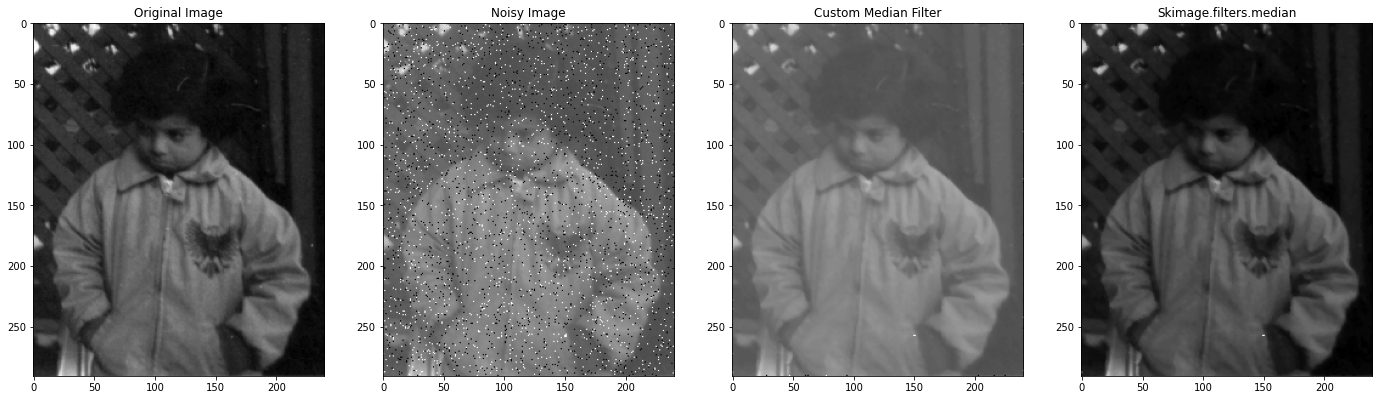

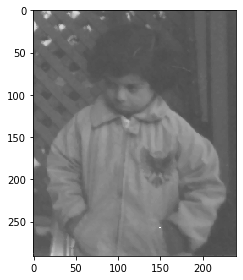

In [16]:
'''
(2) skimage median filter
Optimized Implementation that works in less time
'''

image = io.imread('pout.tif')
noisy_image = random_noise(image, mode = "s&p", amount = 0.05)
show_images([image, noisy_image, median_filter_optimized(noisy_image, 3, 3), median(noisy_image)],
            ['Original Image', 'Noisy Image', 'Custom Median Filter', 'Skimage.filters.median'])
io.imshow(median(noisy_image))

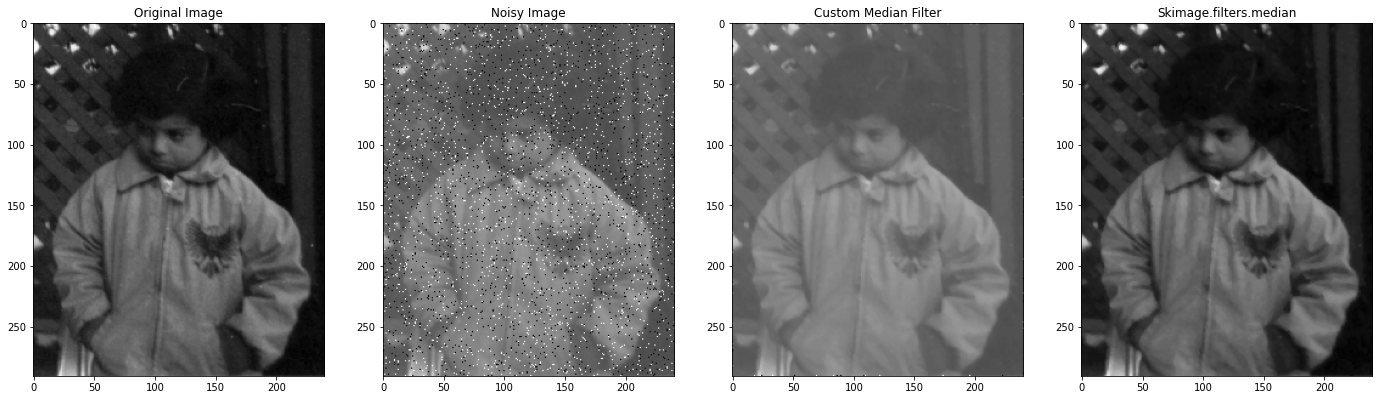

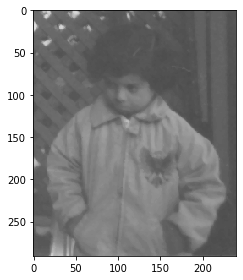

In [15]:
'''
(2) skimage median filter
'''

image = io.imread('pout.tif')
noisy_image = random_noise(image, mode = "s&p", amount = 0.05)

show_images([image, noisy_image, median_filter(noisy_image, 3, 3), median(noisy_image)],
            ['Original Image', 'Noisy Image', 'Custom Median Filter', 'Skimage.filters.median'])
io.imshow(median(noisy_image))

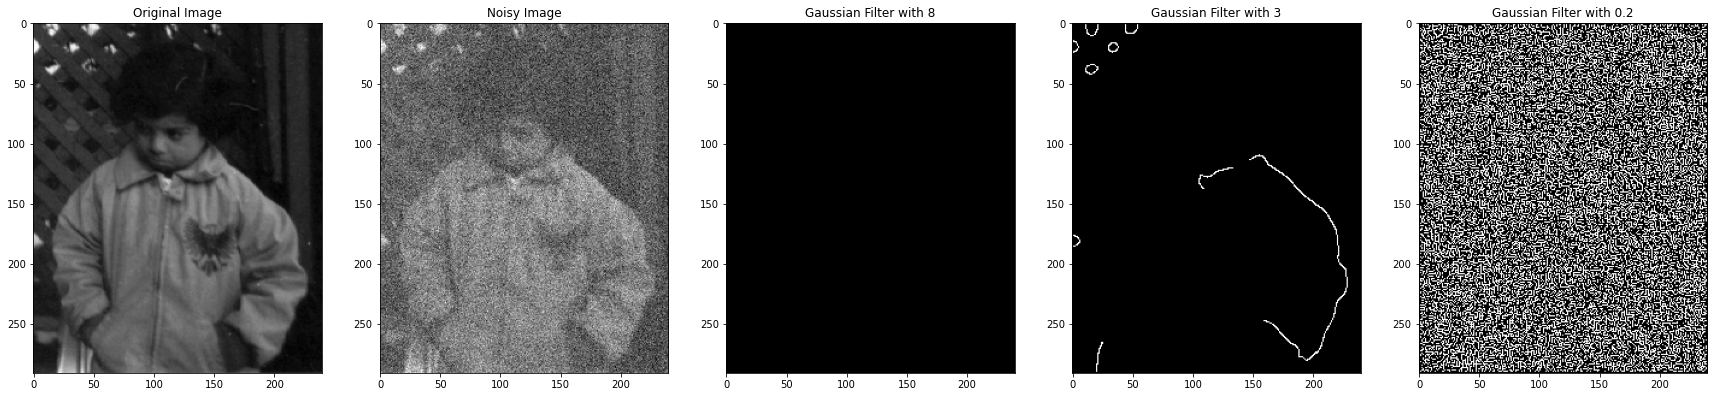

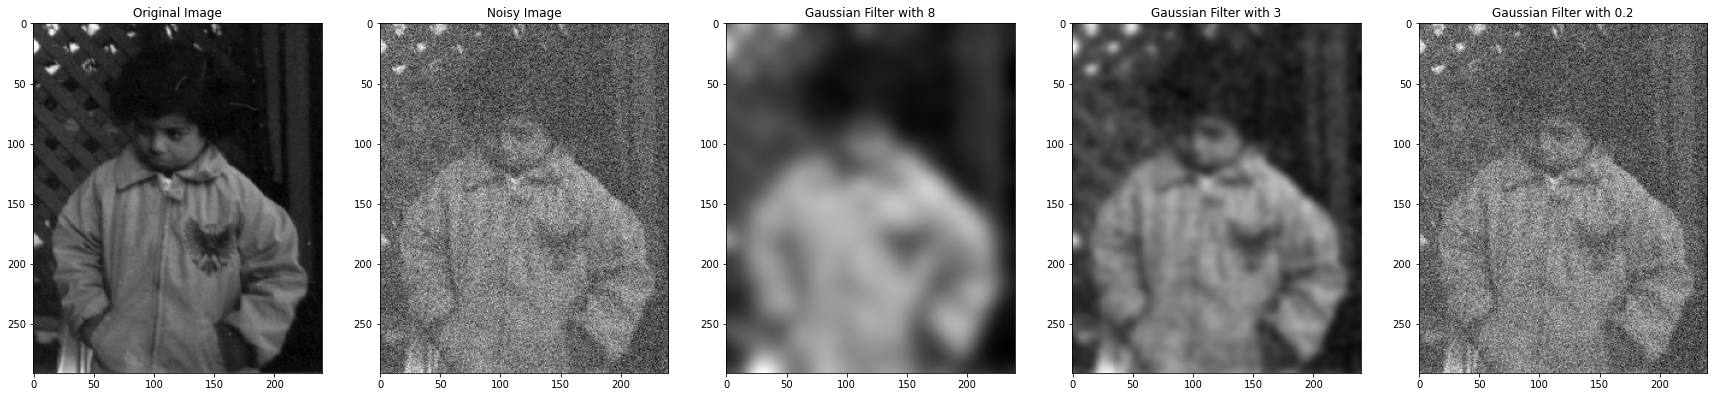

In [10]:
'''
(3) Gaussion Filters
'''
image = io.imread('pout.tif')
noisy_image = random_noise(image) # by default it uses Gaussian (Additive) noise 

# as sigma increases:
# More smoothing, bluring, localization errors, detect very very sharp edges and large scale edges

# as sigma decreases:
# Less smoothing, bluring, localization errors, detect more fine details in the image (fine features)

# using the canny function from the given imports
show_images([image, noisy_image, canny(noisy_image, sigma=8), canny(noisy_image, sigma=3), canny(noisy_image, sigma=0.2)],
            ['Original Image', 'Noisy Image', 'Gaussian Filter with 8', 'Gaussian Filter with 3', 'Gaussian Filter with 0.2'])

# using the gaussian filter from skimage
from skimage.filters import gaussian
show_images([image, noisy_image, gaussian(noisy_image, sigma=8), gaussian(noisy_image, sigma=3), gaussian(noisy_image, sigma=0.2)],
            ['Original Image', 'Noisy Image', 'Gaussian Filter with 8', 'Gaussian Filter with 3', 'Gaussian Filter with 0.2'])
